<a href="https://colab.research.google.com/github/quicksilverTrx/introduction_to_statistical_learning/blob/main/ISL_ch10_ex11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import scipy
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib
from matplotlib import pyplot as plt

In [2]:
!wget "https://www.statlearning.com/s/Ch10Ex11.csv"

--2021-02-15 04:24:55--  https://www.statlearning.com/s/Ch10Ex11.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.145, 198.49.23.145, 198.49.23.144, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.145|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe072c4c46034a4567141/1610604659250/Ch10Ex11.csv [following]
--2021-02-15 04:24:55--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe072c4c46034a4567141/1610604659250/Ch10Ex11.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 23.204.23.118
Connecting to static1.squarespace.com (static1.squarespace.com)|23.204.23.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403088 (394K) [text/csv]
Saving to: ‘Ch10Ex11.csv’

Ch10Ex11.csv        100%[===================>] 393.64K  2.33MB/s    in 0.2s    

2021-02-15 04:24:56 (2.33 MB/s) - ‘

In [13]:
data = pd.read_csv("/content/Ch10Ex11.csv",header=None)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,-0.722730,-0.281955,1.337515,0.701980,1.007616,-0.465383,0.638595,0.286781,-0.227078,-0.220045,-1.242573,-0.108506,-1.864262,-0.500512,-1.325008,1.063411,-0.296371,-0.121646,0.085166,0.624176,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,-0.115765,0.825978,0.346450,-0.569549,-0.131537,0.690229,-0.909038,1.302642,-1.672695,-0.525504,0.797970,-0.689793,0.899531,0.428581,-0.676114,-0.534095,-1.732507,-1.603447,-1.083620,0.033422,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,-0.187579,-1.500163,-1.228737,0.855989,1.249855,-0.898082,0.870206,-0.225253,0.450289,0.551440,0.146294,0.129740,1.304229,-1.661908,-1.630376,-0.077425,1.306182,0.792600,1.559465,-0.688512,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,-0.243219,-0.433034,-0.038791,-0.057897,-1.397762,-0.156187,-2.735982,0.775617,0.614156,2.019194,1.081139,-1.076618,-0.243418,0.513482,-0.512858,2.551676,-2.314301,-1.276470,-1.229271,1.434396,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,1.650957,-1.744909,-0.378885,-0.679826,-2.131584,-0.230172,0.466124,-1.800449,0.626290,-0.097723,-0.299711,-0.529559,-2.023567,-0.510840,0.046003,1.268030,-0.743987,0.223132,0.858463,0.274726,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [5]:
data.columns

Index(['-0.9619334', '0.4418028', '-0.9750051', '1.417504', '0.8188148',
       '0.3162937', '-0.02496682', '-0.063966', '0.03149702', '-0.3503106',
       '-0.7227299', '-0.2819547', '1.337515', '0.7019798', '1.007616',
       '-0.4653828', '0.6385951', '0.2867807', '-0.2270782', '-0.2200452',
       '-1.242573', '-0.1085056', '-1.864262', '-0.5005122', '-1.325008',
       '1.063411', '-0.2963712', '-0.1216457', '0.08516605', '0.6241764',
       '-0.5095915', '-0.2167255', '-0.05550597', '-0.4844491', '-0.5215811',
       '1.949135', '1.324335', '0.4681471', '1.0611', '1.65597'],
      dtype='object')

In [7]:
data.size

39960

In [8]:
data.shape

(999, 40)

In [21]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006397,-0.020648,-0.012895,-0.009400,-0.045544,-0.042226,0.034080,-0.014324,0.020891,0.011189,-0.039798,-0.046899,-0.010548,-0.008516,0.005718,0.001087,0.003757,-0.039782,-0.040910,-0.011585,0.220287,0.187819,0.192665,0.243377,0.212125,0.267359,0.257165,0.231583,0.228899,0.207426,0.189425,0.258240,0.221008,0.210064,0.173273,0.228361,0.282274,0.225682,0.221513,0.281655
std,0.998075,0.997195,1.008409,1.013131,1.016670,0.990254,1.022071,0.999192,0.982149,1.002409,0.992178,1.001031,1.019079,1.030800,0.977736,1.021357,1.042100,1.006514,1.036693,0.999892,1.184559,1.245018,1.193825,1.174967,1.221901,1.165422,1.189890,1.170528,1.200412,1.154199,1.183923,1.147718,1.207654,1.183006,1.134924,1.168938,1.195357,1.206073,1.162343,1.192859
min,-3.056328,-3.240490,-3.527188,-3.065529,-2.997415,-2.853887,-2.745160,-3.627529,-2.852236,-2.571514,-3.508072,-2.463137,-3.312274,-3.668497,-3.143676,-2.927187,-2.735982,-2.899789,-2.986620,-3.643331,-2.956764,-3.549025,-3.105944,-2.973223,-3.218199,-2.913905,-3.426028,-2.941338,-3.116789,-3.034959,-3.479825,-2.884245,-2.897894,-3.348986,-3.855814,-2.921486,-2.866989,-3.233977,-2.711228,-3.581637
25%,-0.684539,-0.703363,-0.724498,-0.701827,-0.732105,-0.688266,-0.646953,-0.662942,-0.665161,-0.697114,-0.662205,-0.761721,-0.644105,-0.701149,-0.666224,-0.692198,-0.802367,-0.741167,-0.689626,-0.639715,-0.581160,-0.634123,-0.521968,-0.574748,-0.655939,-0.506359,-0.561796,-0.546724,-0.587560,-0.603367,-0.618339,-0.538287,-0.628595,-0.606410,-0.604322,-0.579119,-0.506256,-0.588777,-0.561043,-0.503109
50%,0.032338,-0.006061,0.000255,0.017350,-0.043965,-0.011043,0.030870,-0.050119,0.012293,-0.027185,-0.055542,-0.060168,0.017078,0.001063,-0.002157,-0.006049,0.000495,-0.049475,-0.007034,-0.015649,0.117687,0.091288,0.092380,0.222839,0.170787,0.193053,0.160861,0.131933,0.186326,0.173080,0.117568,0.188091,0.139421,0.151444,0.107903,0.106549,0.221271,0.161899,0.121088,0.206375
75%,0.676673,0.660186,0.627725,0.669062,0.661267,0.605053,0.694150,0.639796,0.700920,0.690824,0.631844,0.626675,0.667817,0.650463,0.663221,0.703088,0.701429,0.626941,0.669064,0.620614,0.950353,0.925807,0.882257,0.971996,1.025114,0.975669,0.985485,0.929319,1.005955,0.927890,0.881510,0.957768,0.943367,0.907480,0.859763,0.892117,1.000320,0.984661,0.957578,0.987822
max,3.519299,3.084000,3.458551,3.222134,2.897466,3.069557,3.890746,3.353906,2.769713,3.548017,3.247508,3.474295,2.836365,3.507131,3.554124,4.088422,3.183715,3.013818,3.517389,3.433989,4.751642,4.933632,4.572639,4.276558,4.962931,5.069400,4.585692,5.124180,4.477929,4.067326,4.785525,5.617131,5.375790,4.502580,4.219149,4.485297,4.790423,4.618813,4.814904,5.275066


In [15]:
data_trans=data.transpose()

In [17]:
data_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,-0.744782,-1.131219,-0.716359,0.252652,0.152046,-0.307656,-0.953017,-0.648243,1.224314,0.199812,-0.578484,-0.942301,-0.203728,-1.666475,-0.484455,-0.741073,1.160616,1.012067,-0.072078,-1.136782,0.900625,0.851770,0.727715,0.736502,-0.352130,0.705515,1.300358,0.038252,-0.979284,0.793761,...,1.044724,1.311595,-0.082439,0.919225,-0.243270,0.351094,-1.340384,0.425846,-0.814354,0.693374,0.705545,0.278351,-1.202692,0.642762,-0.605974,-1.377258,-0.925993,0.567244,2.595481,-0.239984,0.687536,-0.151789,0.227544,-0.668648,0.030829,0.028430,-0.365455,-2.208012,0.297039,2.129701,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,0.796082,0.533575,1.228840,-0.806926,1.353509,-1.764702,-0.005029,0.427149,0.210440,-1.666185,1.184845,0.994269,0.926747,-0.264670,-0.230249,-0.504471,-1.990839,0.743979,-0.556870,-0.479310,2.062050,0.377784,-0.774312,1.385666,-0.382461,1.098180,0.819690,0.519038,-1.314318,0.257027,...,0.659689,-2.134584,0.107333,0.854068,-0.333970,0.481353,0.313955,-0.814685,-0.774215,-0.268321,-0.146469,-1.035011,-0.177233,0.021693,0.225943,-0.121365,-0.046371,0.870366,-0.966298,0.683936,0.133901,0.349596,-0.658102,-0.404441,-0.436991,-1.090097,1.031791,0.607007,-0.901949,0.150116,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,0.578544,1.486437,0.742460,-0.029586,-1.406995,1.091640,-1.038571,-1.342906,-0.795976,2.124443,-0.549933,1.994798,-0.376380,1.575234,-0.021040,-2.155544,1.379523,-0.129313,2.250049,0.897206,-1.218953,0.217634,0.112014,-0.915051,-1.193399,0.836531,1.490957,-1.727514,0.366878,0.130601,...,0.696673,1.647552,0.112196,1.444052,-0.189100,0.206080,-1.281535,1.098108,-0.013925,-0.823842,-1.770469,-1.690698,-0.437123,0.732468,-0.747299,1.510237,0.723639,1.113742,0.369311,-1.320221,0.376138,0.400054,-0.628458,-1.338368,-0.496521,-1.128967,0.500785,-2.030893,1.248129,0.442805,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,-1.128211,0.425866,0.687297,1.116365,0.032406,0.180312,-1.837990,0.941953,1.124810,-0.300517,-0.003649,0.370974,-0.732539,-1.397106,0.064355,0.396263,-0.609811,0.406696,-0.455750,-0.649838,0.016223,-0.169406,-0.909253,1.360003,-1.664865,0.910737,1.684782,-0.085450,0.403465,-1.053028,...,0.234142,1.691224,-1.311944,-1.093098,0.280929,-1.700883,-0.093181,-0.268505,-0.957251,1.187016,-0.690879,1.566124,0.124059,0.689585,-0.316889,-0.497628,2.028784,1.931292,0.770238,-1.815744,-1.412319,-1.360738,-0.330777,-0.064344,-0.729967,0.425766,-0.454675,2.524892,-1.673335,0.635132,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,-1.070943,0.088809,-1.126001,-0.905418,-1.628687,-0.441685,1.569250,-0.121166,1.155308,0.588871,1.001318,-0.714287,1.886690,0.396830,-0.590937,-1.654507,0.435358,0.108621,-0.067827,-1.451810,1.274693,1.112912,-0.986879,-0.065011,1.076963,1.174588,-1.509113,0.128302,1.619863,-0.003776,...,-0.853157,-1.454029,0.487805,1.515334,0.199384,-0.206985,-2.991323,-1.132631,0.223605,0.556396,0.381193,-0.544612,-0.030076,0.111951,0.593679,-0.077551,-0.550040,0.272265,-0.129323,-2.276793,-1.275488,0.231706,-1.951500,-0.919365,0.192427,1.198150,1.567731,0.342882,1.3815

In [20]:
data_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.092243,-0.206404,-0.053508,-0.126303,-0.183271,0.120578,-0.152148,0.126798,-0.183427,0.092721,1.114824,1.112381,1.186396,1.139412,0.761329,0.897821,0.824292,0.999109,1.023416,1.011990,0.100493,-0.020515,0.069000,0.267821,-0.212255,0.010106,0.091829,-0.095999,0.117189,-0.090386,0.002325,0.071875,-0.067519,0.165205,0.074507,0.116272,-0.053874,-0.043823,0.208075,0.120921,...,-0.013370,0.082994,-0.200528,0.033509,-0.088750,-0.152962,0.070261,-0.012972,-0.128907,-0.077818,0.106587,-0.202082,0.088180,0.175003,-0.029533,-0.195685,0.133071,-0.095894,0.187240,-0.079040,-0.312234,0.079818,0.064764,-0.270571,-0.013380,-0.042915,-0.140333,-0.042008,0.022046,-0.067525,-0.014669,0.216537,-0.024301,-0.013097,0.257300,0.023095,-0.230898,-0.085085,-0.019799,-0.155358
std,0.854385,0.927181,0.945413,1.178657,1.033089,0.832641,0.992400,0.908319,0.931349,0.975435,1.379792,1.640974,1.392337,1.421502,1.448691,1.381953,1.453593,1.343201,1.335168,1.464446,0.933822,1.066322,1.071620,1.111507,1.058628,0.962516,0.911433,0.980397,0.947943,0.957907,0.995630,0.827974,0.865253,0.955050,1.129995,0.952739,1.037091,1.033850,0.928664,0.963857,...,0.886410,1.140431,1.027561,1.072010,0.981260,1.268434,1.074834,1.073990,0.883348,0.995562,1.084699,1.120591,0.887501,1.035693,0.896922,0.934858,0.878267,1.067321,1.016304,1.181398,1.170222,0.972305,1.012460,1.003034,0.966065,1.123256,1.083315,1.243054,0.997415,1.138240,0.932572,0.978574,0.959890,0.784932,0.996348,1.056003,0.816333,1.306666,1.115447,0.925275
min,-1.864262,-1.732507,-2.058924,-2.735982,-2.131584,-1.404041,-2.192225,-1.927491,-1.501044,-1.672722,-1.481767,-3.191302,-1.453793,-2.523109,-1.628687,-1.857714,-1.913986,-1.639621,-1.345425,-1.666185,-2.037054,-2.771127,-2.253822,-1.959176,-2.533009,-2.155544,-1.990839,-2.208407,-1.439945,-2.001911,-1.872112,-1.845017,-1.539535,-1.376565,-1.749733,-1.845328,-2.042014,-2.492903,-1.314318,-2.471141,...,-1.721873,-2.134584,-2.638432,-2.239425,-2.505206,-2.470138,-2.991323,-1.647439,-1.852132,-2.558442,-2.342653,-2.549993,-1.762628,-2.140003,-1.834986,-1.814197,-0.925993,-2.686400,-1.605517,-2.276793,-2.473618,-2.204240,-2.500960,-2.767486,-2.672201,-2.092555,-1.915574,-2.208012,-2.654219,-2.530259,-3.065529,-2.420576,-1.698148,-1.447535,-1.549967,-1.513097,-1.952056,-3.056328,-2.360090,-2.571514
25%,-0.470149,-0.744604,-0.633732,-1.051921,-0.769417,-0.408256,-0.743054,-0.564491,-0.924322,-0.680538,0.091157,0.351474,0.322402,0.173215,-0.135828,-0.066075,-0.077368,-0.043822,-0.128284,-0.089802,-0.603842,-0.749395,-0.751073,-0.288201,-0.604582,-0.649850,-0.511775,-0.696892,-0.554946,-0.696238,-0.584310,-0.244956,-0.616295,-0.476008,-0.879234,-0.728099,-0.896893,-0.717110,-0.288147,-0.418135,...,-0.588689,-0.592484,-0.808943,-0.656714,-0.678077,-1.202393,-0.442882,-0.824074,-0.782074,-0.517827,-0.701535,-1.019660,-0.447285,-0.301632,-0.733795,-0.979800,-0.556592,-0.703043,-0.505004,-0.930395,-1.1849

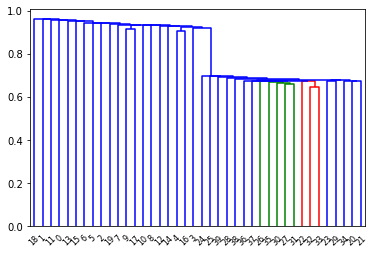

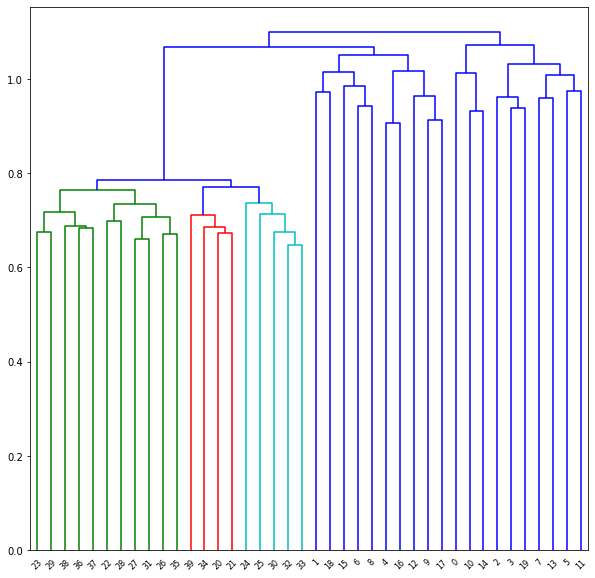

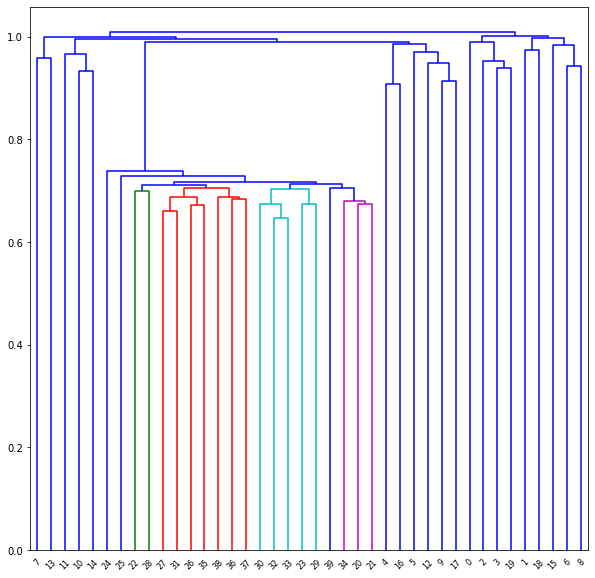

<Figure size 720x720 with 0 Axes>

In [50]:
x_s=linkage(data_trans, 'single', 'correlation')
dn_s=dendrogram(x_s)
fig0 = plt.figure(figsize=(10.0,10.0))
fig0.show()
x_c=linkage(data_trans, 'complete', 'correlation')
dn_c=dendrogram(x_c)
fig1 = plt.figure(figsize=(10.0,10.0))
fig1.show()
x_a=linkage(data_trans, 'average', 'correlation')
dn_a=dendrogram(x_a)
fig2 = plt.figure(figsize=(10.0,10.0))
fig2.show()

In [52]:
x_a

array([[32.        , 33.        ,  0.64669497,  2.        ],
       [27.        , 31.        ,  0.6597489 ,  2.        ],
       [26.        , 35.        ,  0.67174678,  2.        ],
       [20.        , 21.        ,  0.67336944,  2.        ],
       [30.        , 40.        ,  0.67460462,  3.        ],
       [23.        , 29.        ,  0.6746624 ,  2.        ],
       [34.        , 43.        ,  0.68057757,  3.        ],
       [36.        , 37.        ,  0.68320925,  2.        ],
       [41.        , 42.        ,  0.68789636,  4.        ],
       [38.        , 47.        ,  0.687938  ,  3.        ],
       [22.        , 28.        ,  0.69865471,  2.        ],
       [44.        , 45.        ,  0.70243601,  5.        ],
       [48.        , 49.        ,  0.70524438,  7.        ],
       [39.        , 46.        ,  0.70573245,  4.        ],
       [50.        , 52.        ,  0.71084234,  9.        ],
       [51.        , 53.        ,  0.71213823,  9.        ],
       [54.        , 55.